In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

%matplotlib inline

## Draw Lane Lines on Original Image and Shade Green

Number of points before projection =  1440
Number of points after projection =  620


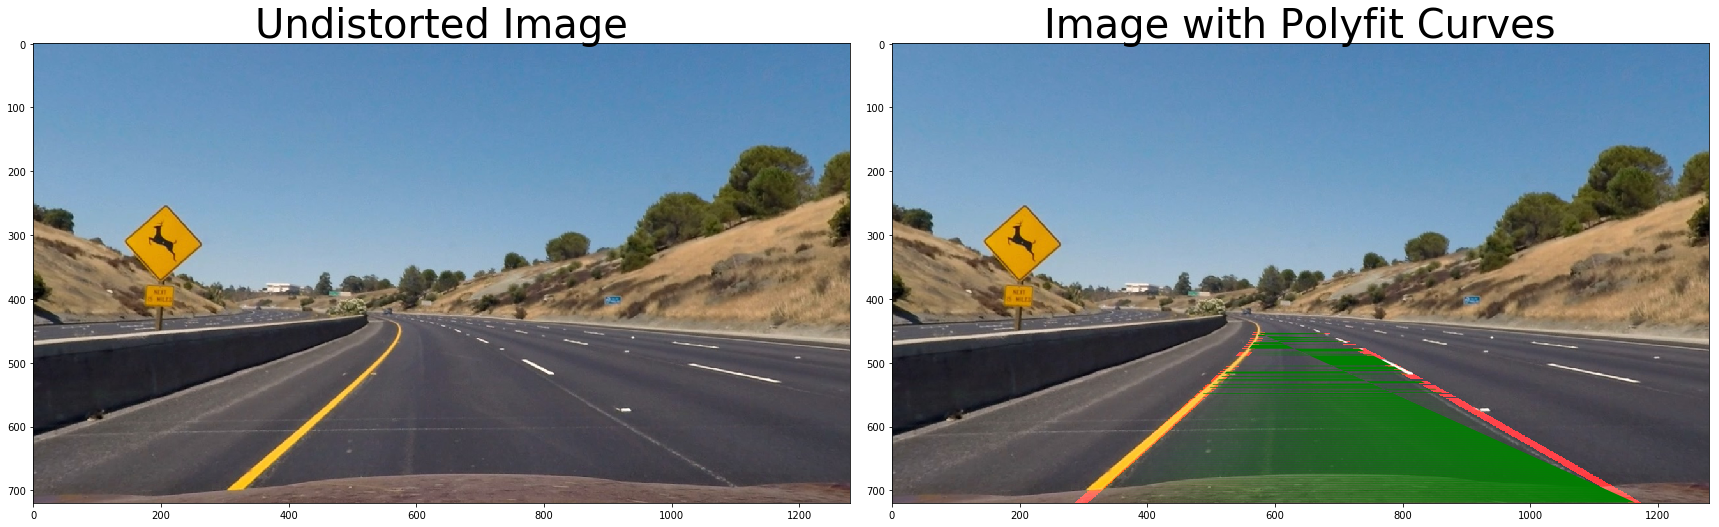

In [5]:
filename = './debug/data_in.dat'

# Loads image_unwrap, Minv, ploty, left_fitx, right_fitx
f = open(filename, 'rb') 
image_unwarped_color, Minv, ploty, left_fitx, right_fitx = pkl.load(f)

# project lane-lines back to original image
image_warp = np.zeros([720,1280,3])

for k in range(len(ploty)-1):
    y  = np.min( [ 719, np.int(ploty[k]) ] )        
    xL = np.min( [ 1279, np.int(left_fitx[k]) ] )
    xR = np.min( [ 1279, np.int(right_fitx[k]) ] )                
    image_warp[y,xL,0] = 255
    image_warp[y,xR,0] = 255

image_unwarp_back = cv2.warpPerspective(image_warp, Minv, (1280,720))


# find all red points projected back to original image
min_red = 0.5
ind = np.where(image_unwarp_back[:,:,0] > min_red)

image1 = np.copy(np.array(image_unwarped_color, dtype=np.uint8))
image2 = np.copy(np.array(image_unwarp_back, dtype=np.uint8))

dx = 10
rcd = image2.shape
dx_max = rcd[1] 

indx_poly = []
indy_poly = []

for k in range(len(ind[0])):
    indy = ind[0][k]
    indx = ind[1][k]
    indL = np.max([0,indx-dx])
    indR = np.min([indx+dx, dx_max-1])
    image2[indy,indL:indR,0] = 255

    indy_poly = np.append(indy_poly, indy)
    indx_poly = np.append(indx_poly, indx)
        
# check number of points before and after projection
print("Number of points before projection = ", 2*len(ploty)) # left and right lane points
print("Number of points after projection = ", len(ind[0])) # left and right lane points in one array


# Draw images

# add images
image_unwarped_back_with_laneline = \
cv2.addWeighted(image1, 1.0, image2, 1.0, 0) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_unwarped_color)
ax1.set_title('Undistorted Image', fontsize=40)
ax2.imshow(image_unwarped_back_with_laneline)
ax2.set_title('Image with Polyfit Curves', fontsize=40)
plt.fill(indx_poly, indy_poly, 'g')



In [12]:
A = np.zeros((10,10))
A[3:7,3:7] = 255

Mi = [[ 0.1, -0.8*0, 0],
 [ 0.0, -0.5*0, 0],
 [ 0.0, 0.0,    1]]

B = cv2.warpPerspective(A, Mi, (1280,720))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(A, cmap='gray')
ax1.set_title('A', fontsize=40)
ax2.imshow(B, cmap='gray')
ax2.set_title('B', fontsize=40)
#plt.fill(indx_poly, indy_poly, 'g')

print(A)
print(B)


TypeError: M is not a numpy array, neither a scalar